## EDA

Importing necessary libraries and reading csv files into dataframes.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Checking null values and shapes

In [7]:
print(df_contract.isna().sum())
print()
print(df_personal.isna().sum())
print()
print(df_internet.isna().sum())
print()
print(df_phone.isna().sum())
print()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

customerID       0
MultipleLines    0
dtype: int64



In [8]:
print(df_contract.shape)
print(df_personal.shape)
print(df_internet.shape)
print(df_phone.shape)

(7043, 8)
(7043, 5)
(5517, 8)
(6361, 2)


Merging all dataframes by 'customerID', df_merged

In [9]:
merged = pd.merge(df_contract, df_personal, on='customerID', how='outer')
merged2 = pd.merge(df_internet, df_phone, on='customerID', how='outer')
df_merged = pd.merge(merged, merged2, on='customerID', how='outer')
df_merged.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [10]:
df_merged.shape

(7043, 20)

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Filling missing values after merging, as well as checking duplicates, and then dropping 'customerID'

In [12]:
cols_to_fill = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
df_merged[cols_to_fill] = df_merged[cols_to_fill].fillna('unknown')

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [14]:
df_merged.duplicated().sum()

0

In [15]:
df_merged.drop('customerID', axis = 1, inplace = True)

Feature Engineering relevant info from BeginDate and mapping EndDate to create an efficient target column

In [16]:
df_merged['BeginDate'] = pd.to_datetime(df_merged['BeginDate'].str.strip(), errors='coerce')
df_merged['EndDate'] = pd.to_datetime(df_merged['EndDate'], errors = 'coerce')

In [17]:
df_merged['EndDate'] = df_merged['EndDate'].notna().map({True:1, False:0})
df_merged.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,unknown
1,2017-04-01,0,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,2016-05-01,0,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,unknown
4,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [18]:
df_merged['begin_year'] = df_merged['BeginDate'].dt.year
df_merged['begin_month'] = df_merged['BeginDate'].dt.month
df_merged['begin_day'] = df_merged['BeginDate'].dt.day
df_merged.drop('BeginDate', axis = 1, inplace = True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EndDate           7043 non-null   int64  
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   object 
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   int64  
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


Using for loop to count unique values pf the object datatype features, will help in OHE

In [19]:
for col in df_merged.columns:
    if df_merged[col].dtype == 'object':
        print(f'{col}: {df_merged[col].nunique()}')

Type: 3
PaperlessBilling: 2
PaymentMethod: 4
TotalCharges: 6531
gender: 2
Partner: 2
Dependents: 2
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
MultipleLines: 3


Creating df_merged_cat

In [20]:
df_merged['TotalCharges'] = pd.to_numeric(df_merged['TotalCharges'], errors='coerce')
df_merged.isna().sum()
df_merged.dropna(subset=['TotalCharges'], inplace = True)
df_merged_cat = df_merged.copy()
df_merged_cat['SeniorCitizen'] = df_merged_cat['SeniorCitizen'].map({0:'No', 1:'Yes'})
for col in df_merged_cat.columns:
    if df_merged_cat[col].dtype == 'object':
        df_merged_cat[col] = df_merged_cat[col].astype('category')
df_merged_cat.info()
df_merged_cat.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EndDate           7032 non-null   int64   
 1   Type              7032 non-null   category
 2   PaperlessBilling  7032 non-null   category
 3   PaymentMethod     7032 non-null   category
 4   MonthlyCharges    7032 non-null   float64 
 5   TotalCharges      7032 non-null   float64 
 6   gender            7032 non-null   category
 7   SeniorCitizen     7032 non-null   category
 8   Partner           7032 non-null   category
 9   Dependents        7032 non-null   category
 10  InternetService   7032 non-null   category
 11  OnlineSecurity    7032 non-null   category
 12  OnlineBackup      7032 non-null   category
 13  DeviceProtection  7032 non-null   category
 14  TechSupport       7032 non-null   category
 15  StreamingTV       7032 non-null   category
 16  StreamingMovies   7032 n

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,begin_year,begin_month,begin_day
0,0,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,Yes,No,...,No,Yes,No,No,No,No,unknown,2020,1,1
1,0,One year,No,Mailed check,56.95,1889.50,Male,No,No,No,...,Yes,No,Yes,No,No,No,No,2017,4,1
2,1,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,No,No,...,Yes,Yes,No,No,No,No,No,2019,10,1
3,0,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,No,No,...,Yes,No,Yes,Yes,No,No,unknown,2016,5,1
4,1,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,No,No,...,No,No,No,No,No,No,No,2019,9,1
5,1,Month-to-month,Yes,Electronic check,99.65,820.50,Female,No,No,No,...,No,No,Yes,No,Yes,Yes,Yes,2019,3,1
6,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,No,No,Yes,...,No,Yes,No,No,Yes,No,Yes,2018,4,1
7,0,Month-to-month,No,Mailed check,29.75,301.90,Female,No,No,No,...,Yes,No,No,No,No,No,unknown,2019,4,1
8,1,Month-to-month,Yes,Electronic check,104.80,3046.05,Female,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,2017,7,1
9,0,One year,No,Bank transfer (automatic),56.15,3487.95,Male,No,No,Yes,...,Yes,Yes,No,No,No,No,No,2014,12,1


In [21]:
cols = ['PaperlessBilling','Partner','Dependents']
df_merged[cols] = df_merged[cols].replace({'Yes': 1, 'No': 0})
df_merged['gender'] = df_merged['gender'].map({'Male':1, 'Female':0})

In [22]:
for col in df_merged.columns:
    if df_merged[col].dtype == 'object':
        print(f'{col}: {df_merged[col].nunique()}')

Type: 3
PaymentMethod: 4
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
MultipleLines: 3


Creating df_merged_ohe

In [23]:
df_merged_ohe = pd.get_dummies(df_merged, drop_first = True)

In [24]:
df_merged_ohe.info()
df_merged_ohe.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   EndDate                                7032 non-null   int64  
 1   PaperlessBilling                       7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender                                 7032 non-null   int64  
 5   SeniorCitizen                          7032 non-null   int64  
 6   Partner                                7032 non-null   int64  
 7   Dependents                             7032 non-null   int64  
 8   begin_year                             7032 non-null   int64  
 9   begin_month                            7032 non-null   int64  
 10  begin_day                              7032 non-null   int64  
 11  Type

,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,begin_year,begin_month,...,DeviceProtection_Yes,DeviceProtection_unknown,TechSupport_Yes,TechSupport_unknown,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_Yes,StreamingMovies_unknown,MultipleLines_Yes,MultipleLines_unknown
0,0,1,29.85,29.85,0,0,1,0,2020,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,56.95,1889.50,1,0,0,0,2017,4,...,1,0,0,0,0,0,0,0,0,0
2,1,1,53.85,108.15,1,0,0,0,2019,10,...,0,0,0,0,0,0,0,0,0,0
3,0,0,42.30,1840.75,1,0,0,0,2016,5,...,1,0,1,0,0,0,0,0,0,1
4,1,1,70.70,151.65,0,0,0,0,2019,9,...,0,0,0,0,0,0,0,0,0,0
5,1,1,99.65,820.50,0,0,0,0,2019,3,...,1,0,0,0,1,0,1,0,1,0
6,0,1,89.10,1949.40,1,0,0,1,2018,4,...,0,0,0,0,1,0,0,0,1,0
7,0,0,29.75,301.90,0,0,0,0,2019,4,...,0,0,0,0,0,0,0,0,0,1
8,1,1,104.80,3046.05,0,0,1,0,2017,7,...,1,0,1,0,1,0,1,0,1,0
9,0,0,56.15,3487.95,1,0,0,1,2014,12,...,0,0,0,0,0,0,0,0,0,0


I now have df_merged_cat which will be used for gradient boosting models, Catboost and LightGBM, which perform better with categorical features and dfe_ohe which will perform best with models that require numerical features (LogisticRegression, RandomForest, etc). I am ready to build and train my models. 

## Analysis

In [25]:
df_merged['EndDate'].value_counts(normalize = True)

0    0.734215
1    0.265785
Name: EndDate, dtype: float64

There is class imbalance with a churn rate of almost 25% in the dataset.

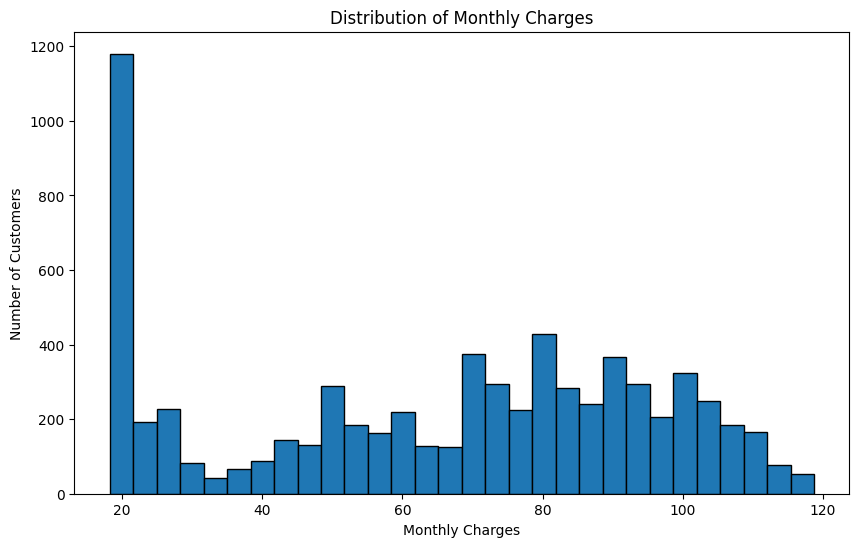

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Optional: better size
plt.hist(df_merged['MonthlyCharges'], bins=30, edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()


Distribtion of monthly charges, shows most customers are paying in the 20 dollar range compared to higher payment plans. 

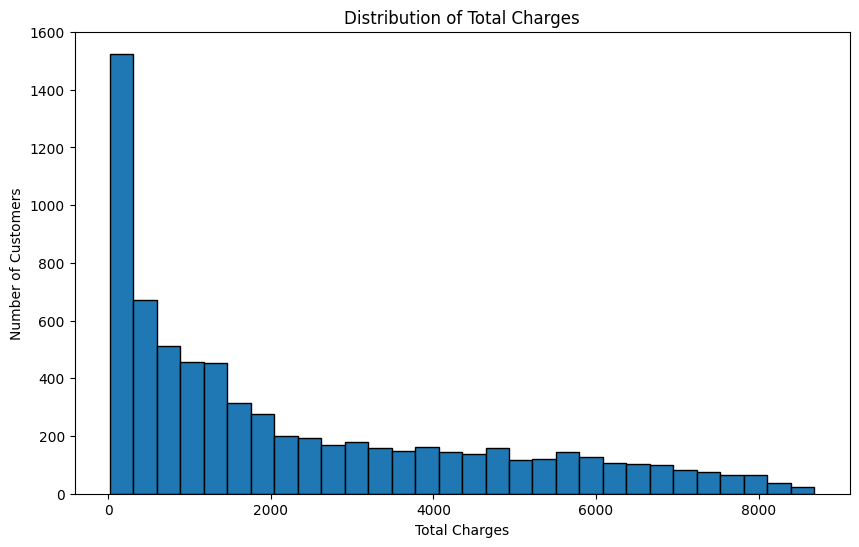

In [27]:

plt.figure(figsize=(10, 6))  # Optional: better size
plt.hist(df_merged['TotalCharges'], bins=30, edgecolor='black')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()



Distribution of Total Charges, most customers have invested less than 500

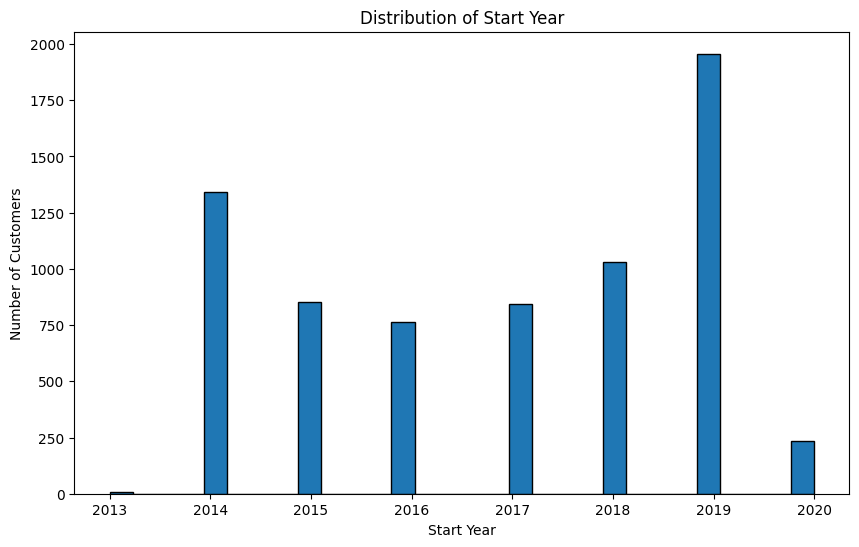

In [28]:
plt.figure(figsize=(10, 6))  # Optional: better size
plt.hist(df_merged['begin_year'], bins=30, edgecolor='black')
plt.title('Distribution of Start Year')
plt.xlabel('Start Year')
plt.ylabel('Number of Customers')
plt.show()


Most Customers started their service in 2019 which is relatively recent. 

   EndDate  monthly_charge
0        0       61.307408
1        1       74.441332


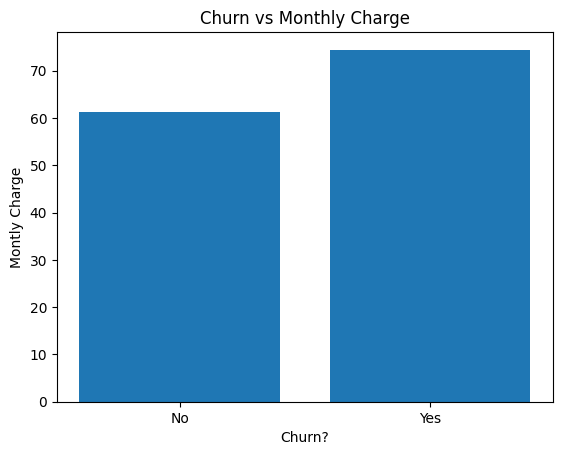

In [29]:
df_monthly = df_merged.groupby('EndDate')['MonthlyCharges'].mean().reset_index(name = 'monthly_charge')
print(df_monthly.head())
df_monthly['EndDate'] = df_monthly['EndDate'].map({0: 'No', 1: 'Yes'})
plt.bar(df_monthly['EndDate'], df_monthly['monthly_charge'])
plt.title('Churn vs Monthly Charge')
plt.xlabel('Churn?')
plt.ylabel('Montly Charge')
plt.show()

On Average, customers who end their service are paying around $13 more than customers who stay with the payment plan.

   begin_year  Churn_Frequency
0        2013                8
1        2014               98
2        2015              123
3        2016              145
4        2017              199
5        2018              315
6        2019              981


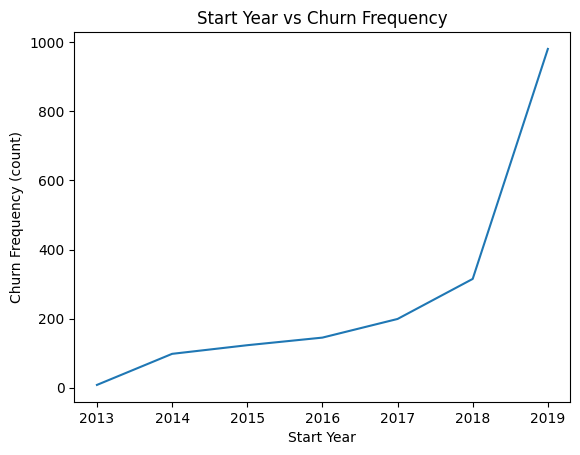

In [30]:
df_year = df_merged.groupby('begin_year')['EndDate'].sum().reset_index(name = 'Churn_Frequency')
df_year.drop(7, inplace = True)
print(df_year)
plt.plot(df_year['begin_year'], df_year['Churn_Frequency'])
plt.title('Start Year vs Churn Frequency')
plt.xlabel('Start Year')
plt.ylabel('Churn Frequency (count)')
plt.show()

Newer Customers have a higher liklihood to drop the service compared to older customers. The churn frequenct (count) increases if the customer begain their service more recently.

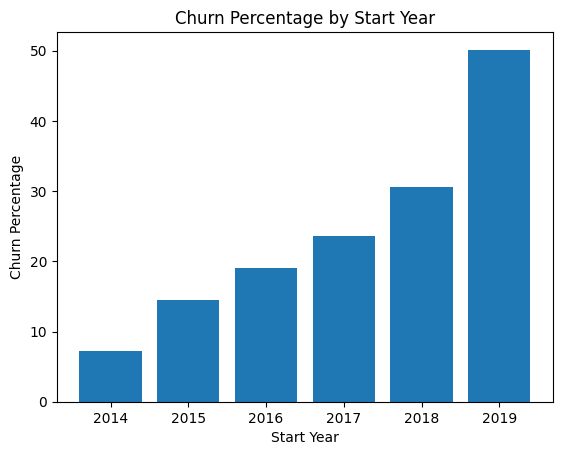

In [31]:
df_year = df_merged.groupby('begin_year')['EndDate'].agg(['sum', 'count']).reset_index()
df_year['percentage'] = (df_year['sum']/df_year['count']) * 100
df_year.drop([0,7], inplace = True)
plt.bar(df_year['begin_year'], df_year['percentage'])
plt.title('Churn Percentage by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Churn Percentage')
plt.show()

Verifying the previous trend with a percentage calulation.

It seems like the new customers are paying a higher price per month and that they also happen to have a higher churn rate, I don't have enough conclusive evidence to determine this as causation but there is definitely a correlation. 

## Work Plan 

1. Preprocessing data: No missing values or duplicates initially. Merge all dataframes with the key column: 'customerID', call it df_merged, and check for missing values. Missing values found in some columns of object datatype, fill those in with 'unknown'. Check for duplicates again, no duplicates. 
2. Convert BeginDate and EndDate to datetime, extract useful features from BeginDate such as year, month, day. For EndDate map it to 0 and 1 to form our target feature. Run for loop to search for number of unique values for each object feature, this will help with one-hot encoding. Also convert TotalCharges object feature to numeric float, drop NAN rows. 
3. I am thinking of having 2 dataframes, df_merged_cat where object features are converted to categorical features useful for models Catboost and LightGBM. The other dataframe is df_ohe which will be one-hot encoded features from the object features which will be necessary for other models such as LogisticRegression, RandomForest, etc.
4. For object features with 2 unique values, will map the two values to 0 and 1 to reduce cardinality and make it easier to read example: 0 corresponds to 'No', 1 corresponds to 'Yes'. Features 3+ unique values will be one-hot encoded.
5. There is a class imbalance so will look to fix that. 
6. Perform analysis looking at monthly charge, total charge, year when service began, and churn. Draw inferences with these correlations.
7. Begin Model Training. I will use: Logistic Regression as a sanity check, Random Forest, LightGBM, and CatBoost. Will use gridsearchCV for hyperparameter tuning. Will split the dataset to training - 60%, validation - 20%, test - 20%. Will perform final testing with best performing model on the test set. Will look to achieve desired AUC-ROC score.
8. Draw inferences based off the results, possible correlations that I missed out on previously I will report.
9. Final Conclusions.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
I generally would recommend against having 2 dataframes, one will suffice and will allow you to do a direct comparison between models.
</div>

## Questions:

1. Is my workplan sufficient for the task? Are there any steps I am missing or possible correlations to data I am missing out on? Please notify me.
2. Any suggestions to feature engineering without contributing to data leakage?
3. Please read through the EDA, analysis, and work plan thorougly, if you have suggestions I would highly appreciate if you could notify me. Thank you for your time and attention. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Answers to questions:<br>
1. Yes the plan in general looks good, my one comment is above. <br>
    2. You can create a 'tenure' feature or something that tracks how long they have had their service. <br>
    3. I really suggest using one dataframe with all categorical values as dummy variables or OHE variables and making your models with these. You cannot leave variables as categorical for any model type. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Aside from my comment, this looks like a good plan. Best of luck on the proje
</div>